In [64]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plot
data = pd.read_csv("Data/Final Dataset.csv")
data.sample(5)


,Season,PlayerId,Player,Position,Team,Conference,Usage Overall,Usage Pass,Usage Rush,Usage FirstDown,...,Team tacklesForLoss,Team thirdDownConversions,Team thirdDowns,Team totalYards,Team turnovers,Stars,Transfer_Portal,PositionId,TeamId,ConferenceId
11571,2021,4431039,Alvin Williams,LB,Colorado,PAC12,NaN,NaN,NaN,NaN,...,60,51,158,3089,7,NaN,No,0,64,4
3785,2021,4431498,Jayden Ballard,WR,Ohio State,Big10,0.0011,0.0020,0.0000,0.0000,...,83,81,155,7296,11,NaN,No,2,16,1
7244,2023,4692602,Key Lawrence,DB,Oklahoma,Big12,NaN,NaN,NaN,NaN,...,94,87,178,6591,20,NaN,No,6,36,2
12327,2023,4431612,Keanu Williams,DL,UCLA,PAC12,NaN,NaN,NaN,NaN,...,105,88,198,5552,22,NaN,No,1,65,4
4584,2023,4431152,Jackson Acker,RB,Wisconsin,Big10,0.1003,0.0419,0.1671,0.0972,...,78,88,199,4957,17,NaN,No,8,21,1


In [31]:
#sklearn imports
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [39]:
df = data.copy().drop(columns=['Player','Team','Conference','Position','Division'])
df['Transfer_Portal'] = np.where(df['Transfer_Portal'].values == 'Yes', 1, 0)
df = df.fillna(0)
df[df['Transfer_Portal'] == 1]

,Season,PlayerId,Usage Overall,Usage Pass,Usage Rush,Usage FirstDown,Usage SecondDown,Usage ThirdDown,Usage StandardDowns,Usage PassingDowns,...,Team tacklesForLoss,Team thirdDownConversions,Team thirdDowns,Team totalYards,Team turnovers,Stars,Transfer_Portal,PositionId,TeamId,ConferenceId
2,2020,3858274,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,...,52,65,147,4245,14,3.0,1,1,2,0
25,2020,4035363,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,...,52,65,147,4245,14,3.0,1,1,2,0
43,2020,4035896,0.0028,0.0073,0.0000,0.0000,0.004,0.007,0.000,0.011,...,75,51,133,4860,14,3.0,1,2,1,0
44,2020,4035995,0.0083,0.0119,0.0052,0.0060,0.009,0.014,0.000,0.016,...,62,64,143,4885,24,4.0,1,12,6,0
75,2020,4037514,0.0071,0.0155,0.0000,0.0000,0.011,0.021,0.023,0.004,...,69,64,141,6447,13,3.0,1,2,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763,2023,5083972,0.0025,0.0039,0.0000,0.0028,0.004,0.000,0.005,0.000,...,66,68,177,4363,11,3.0,1,2,64,4
12771,2023,5085112,0.0036,0.0057,0.0000,0.0026,0.004,0.006,0.000,0.008,...,62,67,159,5039,21,3.0,1,12,60,4
12779,2023,5085888,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,...,80,57,148,5320,13,4.0,1,0,61,4
12784,2023,5086647,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000,...,74,80,163,5824,14,3.0,1,1,66,4


In [72]:
k_folds = KFold(n_splits = 5)
X = df.copy().drop(columns=['Transfer_Portal'])
y = df['Transfer_Portal']

@ignore_warnings(category=ConvergenceWarning)
def classifiers():
    logistic_clf = LogisticRegression(max_iter=5000)
    SVM_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    forest_clf = RandomForestClassifier(random_state=42)

    logistic_f1 = cross_val_score(logistic_clf, X, y, cv=k_folds, scoring='f1')
    SVM_f1 = cross_val_score(SVM_clf, X, y, cv=k_folds, scoring='f1')
    forest_f1 = cross_val_score(forest_clf, X, y, cv=k_folds, scoring='f1')

    logistic_pre = cross_val_score(logistic_clf, X, y, cv=k_folds, scoring='precision')
    SVM_pre = cross_val_score(SVM_clf, X, y, cv=k_folds, scoring='precision')
    forest_pre = cross_val_score(forest_clf, X, y, cv=k_folds, scoring='precision')

    logistic_re = cross_val_score(logistic_clf, X, y, cv=k_folds, scoring='recall')
    SVM_re = cross_val_score(SVM_clf, X, y, cv=k_folds, scoring='recall')
    forest_re = cross_val_score(forest_clf, X, y, cv=k_folds, scoring='recall')

    print(SVM_f1.mean())
    print(logistic_f1.mean())
    print(forest_f1.mean())
    print(' ')
    print(SVM_pre.mean())
    print(logistic_pre.mean())
    print(forest_pre.mean())
    print(' ')
    print(SVM_re.mean())
    print(logistic_re.mean())
    print(forest_re.mean())

classifiers()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf_l = LogisticRegression(max_iter=5000).fit(X_train, y_train)
clf_r = RandomForestClassifier(random_state=42).fit(X_train, y_train)
clf_s = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)

In [43]:
#Logistic CM
y_pred = clf_l.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

3786 15 435 7


In [44]:
#RF CM
y_pred = clf_r.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

3800 1 15 427


In [66]:
player_pos = pd.DataFrame(df.iloc[2]).T
player_neg = pd.DataFrame(df.iloc[4584]).T
#Probability of a player that did transfer
print(clf_r.predict_proba(player_pos.drop(columns=['Transfer_Portal'])))

#Probability of a player that did not
print(clf_r.predict_proba(player_neg.drop(columns=['Transfer_Portal'])))

[[0.08 0.92]]
[[0.98 0.02]]


In [45]:
#SVM CM
y_pred = clf_s.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

3801 0 27 415


In [47]:
#PCA
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 
pca = PCA(n_components=40)
pca.fit(data_scaled)
# print(pca.explained_variance_ratio_)
# print(' ')
print(sum(pca.explained_variance_ratio_))

0.9636564830315602


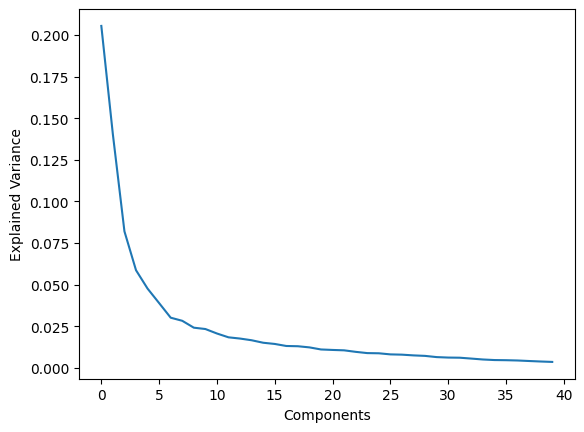

In [30]:
plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

LR - needs more looking into, might work using PCA to help with efficiency, overall horrible out the box

RF - Great performance out the box, doesn't need tuning and will most likely be efficient enough to not need PCA on full data set. 
Performs better than SVM, but can't use SVM due to not being probablistic. 

Because RF is pretty accurate without tuning on full dataset, we need to compare with other forms of data to see if there's a better probability return.

RF will probably be used to initially explore conference/team probability.


In [ ]:
#Use data and classifiers/PCA already present to run through conf/team prob.